In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

__Oppgave 1__ <br>
<span style="color:gray">*Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of
rows and columns in Grc_df? <br> Print the first 10 and last 10 rows of Grc_df.*</span><br><br>
Answer: The Grc_df DataFrame contains 5000 rows and 12 columns.

In [502]:
#Reading the csv file and creating a DataFrame names Grc_df
Grc_df = pd.read_csv('Grocery_dataset.csv')

#Check number of rows and colums
Grc_df.shape

(5000, 12)

In [503]:
#Printing the first 10 rows
Grc_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [504]:
#Printing the last 10 rows
Grc_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4990,FDE46,18.60,Low Fat,0.015859,Snack Foods,152.9366,OUT017,2007,NaN,Tier 2,Supermarket Type1,453.4098
4991,NCQ53,17.60,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240
4992,NCN42,20.25,Low Fat,0.014281,Household,148.0418,OUT018,2009,Medium,Tier 3,Supermarket Type2,1177.1344
4993,DRH11,5.98,Low Fat,0.075675,Hard Drinks,53.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,331.5684
4994,NCI42,18.75,Low Fat,0.010382,Household,207.8954,OUT049,1999,Medium,Tier 1,Supermarket Type1,2292.3494
4995,FDT07,5.82,Regular,0.077476,Fruits and Vegetables,255.3330,OUT045,2002,NaN,Tier 2,Supermarket Type1,4870.3270
4996,DRL60,8.52,Low Fat,0.027059,Soft Drinks,153.3682,OUT046,1997,Small,Tier 1,Supermarket Type1,914.8092
4997,FDG20,15.50,Regular,0.126200,Fruits and Vegetables,178.4028,OUT018,2009,Medium,Tier 3,Supermarket Type2,1239.7196
4998,FDF56,16.70,Regular,0.119462,Fruits and Vegetables,182.7976,OUT046,1997,Small,Tier 1,Supermarket Type1,1810.9760
4999,FDV33,9.60,Regular,0.027455,Snack Foods,258.1304,OUT018,2009,Medium,Tier 3,Supermarket Type2,2324.9736


__Oppgave 2__<br>
<span style="color:gray">*Are there any null values in the Grc_df? If yes, then in which columns and how many?
Finally, handle these null values using any strategy shown during the labs.*</span><br><br>

Answer: Grc_df.info() shows that there are 818 null values in Item_Weight and 1439 null values in Outlet_Size. We opted for imputation to handle missing values because eliminating a large number of rows would significantly reduce the size of our dataframe, potentially affecting the robustness of our subsequent analysis or model. We replace the Item_Weight with the median. Since the data is slightly right-skewed, it would be better to use the median rather than the mean to fill any missing values in Item_Weight. The median will be more resistant to the influence of outliers, providing a better central value for the skewed distribution. Since Outlet_Size is categorical, we can't compute a mean or a median. However, using Sikt-KI chat's advice, we assessed category frequencies to handle missing values, maintaining the original distribution.


In [505]:
#Check is there are null values
Grc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [506]:
#Check the number of null values
Grc_df = Grc_df.replace(' ', np.nan)
Grc_df.isna().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

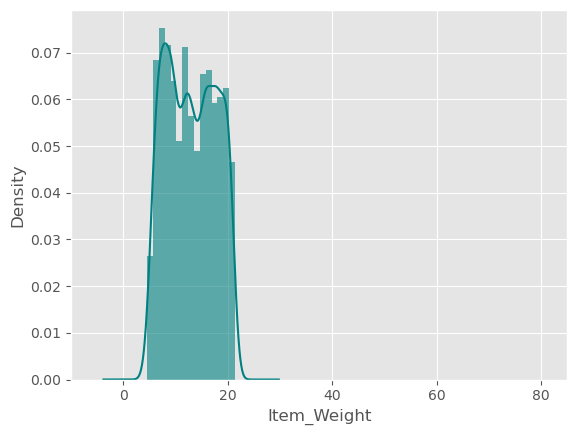

In [507]:
# Plot the histogram of 'Item_Weight' with 15 bins, density=True, and add a stacked appearance
ax = Grc_df["Item_Weight"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)

# Plot the density plot for 'Item_Weight' on the same axis
Grc_df["Item_Weight"].plot(kind='density', color='teal')

# Set the label for the x-axis
ax.set(xlabel='Item_Weight')

# Set the x-axis limits
plt.xlim(-10,85)

# Show the plot
plt.show()

In [508]:
mean_Item_Weight = Grc_df["Item_Weight"].mean() #Finding the mean Item_Weight
median_Item_Weight = Grc_df["Item_Weight"].median() #Finding the median Item_Weight

#Not a large difference between the mean and median, but there is a skewed curve (will use the median)

print(f'Mean of Item_Weight: {mean_Item_Weight:.2f}') #Printing the mean Item_Weight with two decimals
print(f'Median of Item_Weight: {median_Item_Weight:.2f}') #Printing the median Item_Weight with two decimals

Mean of Item_Weight: 12.96
Median of Item_Weight: 12.80


In [509]:
#Replacing null values of Item_weight with median
Grc_df['Item_Weight'].fillna(median_Item_Weight, inplace=True)

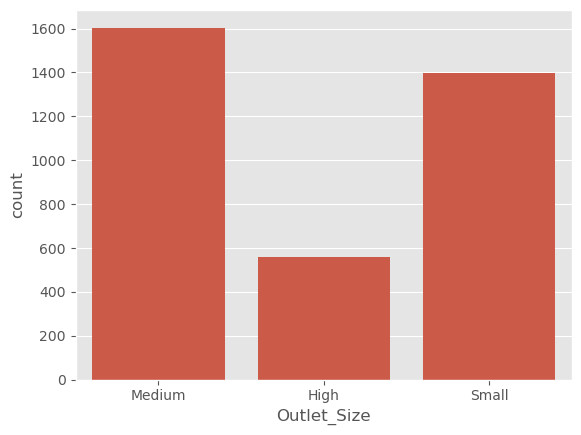

In [510]:
# Frequency plot of Outlet Size
sns.countplot(x='Outlet_Size', data=Grc_df)


plt.show()


In [511]:
# Get the distribution of the non-null values
dist = Grc_df['Outlet_Size'].value_counts(normalize=True)

# Get a list of the categories
categories = dist.index

# Create a list to sample from, replicating the distribution
fill_list = np.random.choice(categories, size=Grc_df['Outlet_Size'].isnull().sum(), p=dist.values)

# Replace the NaN values in the DataFrame
Grc_df.loc[Grc_df['Outlet_Size'].isnull(), 'Outlet_Size'] = fill_list

In [512]:
# Making sure there are no null values left
Grc_df.isna().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

__Oppgave 3__<br>
<span style="color:gray">*How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and which is minimum?*</span><br><br>

Answer: 3 (Medium, High, Small) <br>
Max: Medium  <br>
Min: High

In [513]:
#Count the number of unique Outlet Sizes
Grc_df.Outlet_Size.nunique()

3

In [514]:
# Display the count of each Outlet_Size category
outlet_size_counts = Grc_df['Outlet_Size'].value_counts()
print(f'The outlet size count is: ', outlet_size_counts)

The outlet size count is:  Outlet_Size
Medium    2222
Small     1988
High       790
Name: count, dtype: int64


In [515]:
# Finding the most frequent(maximum) Outlet Size
Grc_df['Outlet_Size'].value_counts().idxmax()

'Medium'

In [516]:
# Finding the least frequent(minimum) Outlet Size
Grc_df['Outlet_Size'].value_counts().idxmin()

'High'

__Oppgave 4__<br>
<span style="color:gray">*How many unique Item Fat Content types are in the Grc_df? List them. Do you see any
issues with the Item Fat Content types? If yes, then handle this issue.*</span> <br><br>

Answer: The labeling for 'Low Fat' and 'Regular' categories in the dataset lacks uniformity. Variations like 'low fat', 'LF', or 'reg' are used interchangeably. To maintain consistency in our data, we should standardize these labels to only 'Low Fat' and 'Regular'

In [517]:
# Count the number of unique Outlet Size values
Grc_df.Item_Fat_Content.nunique()

5

In [518]:
# Display the count of each Outlet_Size category
Grc_df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    3008
Regular    1679
LF          183
reg          68
low fat      62
Name: count, dtype: int64

In [519]:
# Create a dictionary of terms we want to replace
replace_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}

# Replace terms in the table according to replace_dict
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace(replace_dict)

__Oppgave 5__<br>
<span style="color:gray">*Drop the columns having index values of 0, 6 and create a new DataFrame Grc_new_df.*</span>

In [520]:
# Listing the columns in the Grc_df DataFrame
Grc_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [521]:
# Get the column names to drop
cols_to_drop = Grc_df.columns[[0, 6]]

# Drop the columns and create a new DataFrame
Grc_new_df = Grc_df.drop(cols_to_drop, axis=1)

In [522]:
# Checking if the columns were deleted from the new DataFrame
Grc_new_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

__Oppgave 6__<br><br>
<span style="color:gray">*Using different Supermarket type listed in the column Outlet_Type create two different
DataFrames from Grc_new_df. <br> Name these DataFrames as SupType_1 and SupType_2.*</span>

In [523]:
# Listing the Outlet Types and their counts
Grc_new_df["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    3328
Grocery Store         608
Supermarket Type3     538
Supermarket Type2     526
Name: count, dtype: int64

In [524]:
SupType_1 = Grc_new_df.loc[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df.loc[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']

print(f"{SupType_1['Outlet_Type'].value_counts()}")
print("\n")
print(f"{SupType_2['Outlet_Type'].value_counts()}")

Outlet_Type
Supermarket Type1    3328
Name: count, dtype: int64


Outlet_Type
Supermarket Type2    526
Name: count, dtype: int64


__Oppgave 7__<br><br>
<span style="color:gray">*Using Seaborn (“ggplot style”) create a (2,1) subplot of a box plot showing 5-point 
summary of the column Item_MRP for SupType_1 and SupType_2. <br>Which Outlet Type has 
a higher median MRP? Are there any outliers?*</span><br><br>

Answer: Supermarked Type 1 has a higher median (144.75) than Supermarked Type 2 (130.18).<br><br>
There do not appear to be any obvious outliers in either boxplot, as no points are plotted outside the whiskers indicating significantly higher or lower values than the rest of the data.

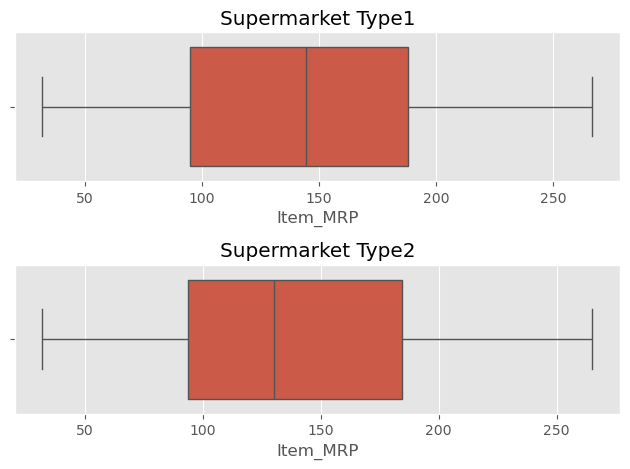

In [525]:
# Set the style to ggplot
plt.style.use('ggplot')

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1)

# Create a boxplot for SupType_1
sns.boxplot(ax=axes[0], x='Item_MRP', data=SupType_1)
axes[0].set_title('Supermarket Type1')

# Create a boxplot for SupType_2
sns.boxplot(ax=axes[1], x='Item_MRP', data=SupType_2)
axes[1].set_title('Supermarket Type2')

# Display the plot
plt.tight_layout()
plt.show()

In [526]:

print(f"Median MRP for Supermarket 1 is {SupType_1['Item_MRP'].median():.2f}")
print(f"Median MRP for Supermarket 2 is {SupType_2['Item_MRP'].median():.2f}")

Median MRP for Supermarket 1 is 144.75
Median MRP for Supermarket 2 is 130.18


__Oppgave 8__<br><br>
<span style="color:gray">*Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame 
Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales. 
What is the Outlet_Location_type of the store with the lowest sales?*</span><br><br>

Answer:
Tier 3 is the Outlet Location Type with the lowest sales.  

In [527]:
# Concatenate the DataFrames
Grc_Concat_df = pd.concat([SupType_1, SupType_2])

# Sort the DataFrame
Grc_Concat_df = Grc_Concat_df.sort_values('Item_Outlet_Sales')

Grc_Concat_df.head()



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2370,20.500,Low Fat,0.143164,Household,34.9190,1987,High,Tier 3,Supermarket Type1,73.2380
1657,6.635,Regular,0.046278,Frozen Foods,36.7506,2009,Medium,Tier 3,Supermarket Type2,75.9012
1543,6.320,Low Fat,0.012770,Meat,39.9822,2009,Medium,Tier 3,Supermarket Type2,78.5644
3586,9.105,Low Fat,0.038560,Household,33.8900,2002,Small,Tier 2,Supermarket Type1,99.8700
2711,19.250,Low Fat,0.108030,Household,32.4558,1997,Small,Tier 1,Supermarket Type1,101.8674


__Oppgave 9__<br><br>
<span style="color:gray">*Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for 
Grc_Concat_df.*</span>

In [528]:
# Set multiple index
Grc_Concat_df.set_index(['Outlet_Size', 'Outlet_Location_Type'], inplace=True)

# Printing a sample of the table with multiple index
Grc_Concat_df.sample(10)

Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
Small       Tier 1                      11.10          Regular   
Medium      Tier 1                      12.65          Low Fat   
Small       Tier 2                      13.35          Low Fat   
            Tier 2                      12.60          Low Fat   
            Tier 2                       6.32          Low Fat   
            Tier 1                       8.60          Low Fat   
            Tier 2                       6.85          Low Fat   
High        Tier 2                      13.35          Low Fat   
Small       Tier 2                      10.65          Low Fat   
            Tier 2                      15.85          Low Fat   

                                  Item_Visibility              Item_Type  \
Outlet_Size Outlet_Location_Type                                           
Small       Tier 1                       0.036028           Frozen Foods   
Medium      Tier 1                       0.042277              Household   
Small       Tier 2                       0.017821                  Dairy   
            Tier 2                       0.024190                  Dairy   
            Tier 2                       0.000000                   Meat   
            Tier 1                       0.032622     Health and Hygiene   
            Tier 2                       0.022879           Frozen Foods   
High        Tier 2                       0.038745            Snack Foods   
Small       Tier 2                       0.000000  Fruits and Vegetables   
            Tier 2                       0.069241                 Breads   

                                  Item_MRP  Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type                                        
Small       Tier 1                177.2712                       1997   
Medium      Tier 1                108.4938                       1999   
Small       Tier 2                 75.1012                       2002   
            Tier 2                 34.4874                       2004   
            Tier 2                 40.2822                       2004   
            Tier 1                143.2154                       1997   
            Tier 2                262.3594                       2004   
High        Tier 2                239.3564                       2007   
Small       Tier 2                 57.1272                       2004   
            Tier 2                217.5166                       2002   

                                        Outlet_Type  Item_Outlet_Sales  
Outlet_Size Outlet_Location_Type                                        
Small       Tier 1                Supermarket Type1          3339.6528  
Medium      Tier 1                Supermarket Type1          1500.7132  
Small       Tier 2                Supermarket Type1          1366.2216  
            Tier 2                Supermarket Type1           494.0236  
            Tier 2                Supermarket Type1          1139.1838  
            Tier 1                Supermarket Type1          2127.2310  
            Tier 2                Supermarket Type1          3924.8910  
High        Tier 2                Supermarket Type1          3098.6332  
Small       Tier 2                Supermarket Type1           279.6360  
            Tier 2                Supermarket Type1           653.1498

__Oppgave 10__<br><br>
<span style="color:gray">*Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's 
mean, minimum, maximum, and count.*</span>

In [529]:
Grc_Concat_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [530]:
# Create buckets
Grc_Concat_df['Buckets'] = pd.cut(Grc_Concat_df['Item_Weight'], bins=10)

# Group by the buckets and calculate mean, min, max and count
bucket_analysis = Grc_Concat_df.groupby('Buckets')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])

# Print the result
print(bucket_analysis)

                       mean     min     max  count
Buckets                                           
(4.538, 6.234]     5.623814   4.555   6.215    253
(6.234, 7.914]     7.121807   6.235   7.905    476
(7.914, 9.594]     8.761867   7.930   9.500    450
(9.594, 11.273]   10.344917   9.600  11.150    362
(11.273, 12.952]  12.081635  11.300  12.850    419
(12.952, 14.632]  13.716193  13.000  14.600    352
(14.632, 16.312]  15.495976  14.650  16.250    410
(16.312, 17.991]  17.172672  16.350  17.850    408
(17.991, 19.671]  18.838005  18.000  19.600    396
(19.671, 21.35]   20.357012  19.700  21.350    328


C:\Users\47408\AppData\Local\Temp\ipykernel_11124\4156194491.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_analysis = Grc_Concat_df.groupby('Buckets')['Item_Weight'].agg(['mean', 'min', 'max', 'count'])
